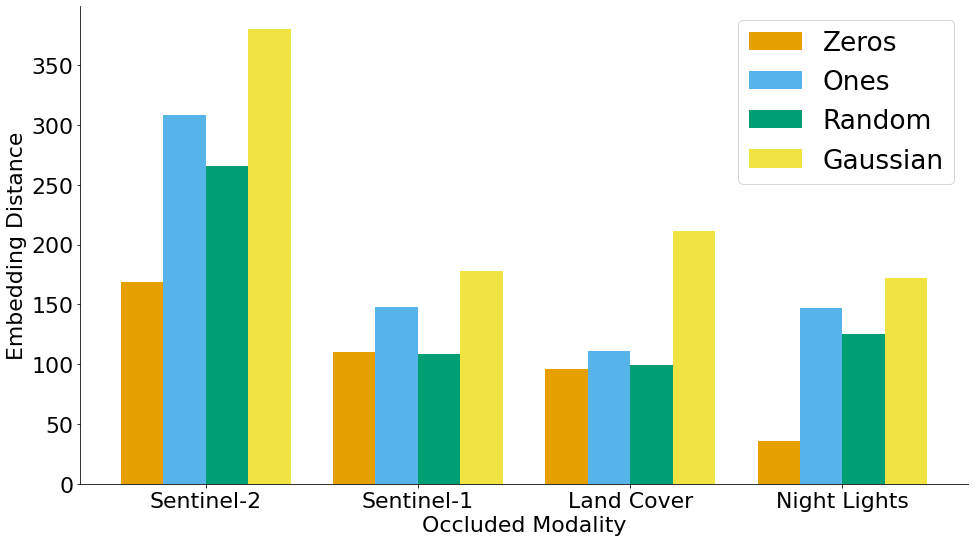

In [16]:
# Re-importing necessary library after reset
import matplotlib.pyplot as plt
import numpy as np

# Given data
zeros = [132.655424043244, 116.3951259687835, 60.39162911474705, 53.00803888545317, 208.40214261821671]
ones = [175.21505669986502, 130.0845255758248, 124.68870041417141, 155.28007103415098, 197.30100998223998]
random = [196.70148722330728, 119.66299636691224, 96.81387319751815, 127.99533675698673, 261.40220477534274]
gaussian = [1605.6458943684895, 351.56251525878906, 216.8501518099916, 251.81725789986405, 2021.0022140203737]


ones2 = [308.17128132838826, 147.5261610395768, 111.42803139780082, 146.7523219351675, 251.4878526575425]
zeros2 = [169.06762635474112, 110.02983878640568, 96.02427720760598, 35.77487814426422, 262.8586406333774]
gaussian2 = [380.1900431315105, 178.00806546678731, 211.33840658150467, 172.23074942944098, 1654.1504504633886]
random2 = [265.4762061623966, 108.28149117675483, 99.02628687316296, 125.21430187599331, 238.44577781826843]

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

# Combining data into a matrix for easier plotting
data = np.array([zeros2[:-1], ones2[:-1],  random2[:-1], gaussian2[:-1]])
categories = ['Zeros', 'Ones', 'Random', 'Gaussian']

# Plot setup
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.2
indices = np.arange(data.shape[1])

# Color-blind friendly color palette
colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442']

# Creating bars for each group with color-blind friendly colors
for i, category in enumerate(categories):
    ax.bar(indices + i * bar_width, data[i], bar_width, label=category, color=colors[i])

# Finishing touches
ax.set_xticks(indices + bar_width * 1.5)
ax.set_xticklabels(["Sentinel-2", "Sentinel-1", "Land Cover", "Night Lights"])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(fontsize='large', loc='upper right')  # Adjusted legend size

plt.xlabel('Occluded Modality')
plt.ylabel('Embedding Distance')
plt.tight_layout()
plt.savefig('./occlusion.png',dpi=500)

plt.show()

In [1]:
import os
import torch
import albumentations as A
import numpy as np
from utils import transform_data, calculate_modality_means, plot_means
from utils import load_json, prepare_test_dataset_loader_model, get_data_viz, viz_bar_images, viz_images
device = "cuda" if torch.cuda.is_available() else "cpu"

%load_ext autoreload
%autoreload 2

/opt/conda/lib/python3.8/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


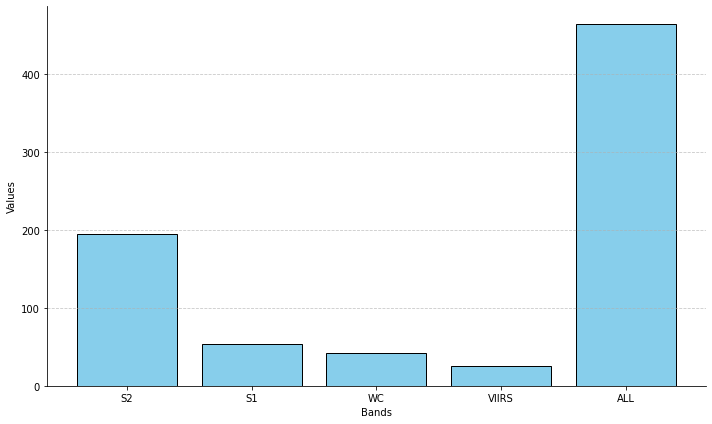

dict_values([194.46826939489327, 53.44498363663168, 42.504913999680795, 25.87184985361847, 464.2757843615962])


In [2]:
exp_name = '61__regularizer_all'

# Load your data
test_logged_diffs = torch.load(f'./logs/{exp_name}/logged_test_diffs_{exp_name}.pt', map_location=torch.device('cpu'))

transformed_test_influence_scores= transform_data(test_logged_diffs)
mean_modality_influence_scores = calculate_modality_means(transformed_test_influence_scores)
plot_means(mean_modality_influence_scores.values(), test=True)

#### Occlusion Strategy 

#### Exp results - test set MAE absolute difference - later to compare with the test set influence values 

##### Together with influence scores and relative performance deviation

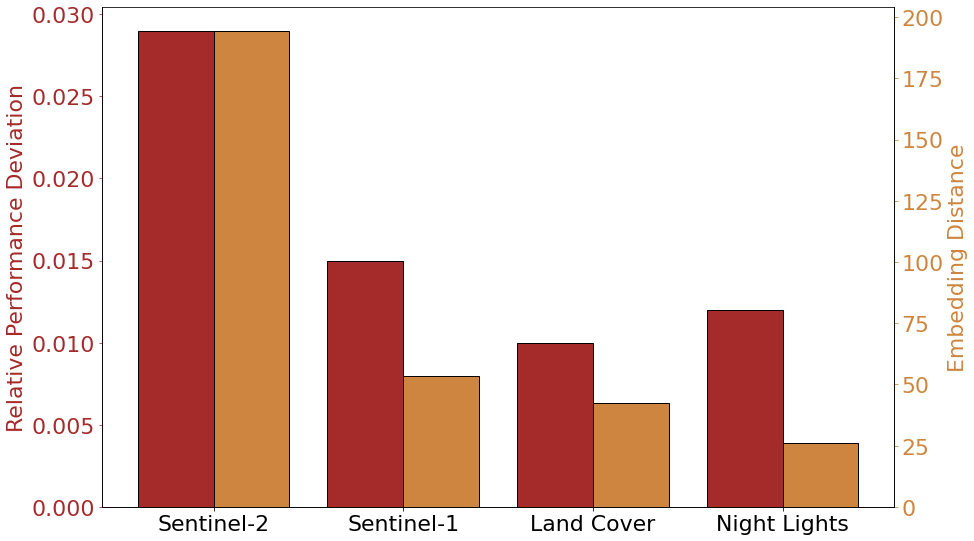

In [32]:
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

# Given individual_mae and individual_rmse for the first four modalities excluding the last one
relative_performance_deviation_mae = [0.109, 0.123, 0.128, 0.126]
inverted_mse = [max(relative_performance_deviation_mae) + 0.01 - mse for mse in relative_performance_deviation_mae]
influence_scores_distances = [194.46826939489327, 53.44498363663168, 42.504913999680795, 25.87184985361847]

# Bar positions for the first set of bars (MAE)
bar_positions_mae = range(len(relative_performance_deviation_mae))

bar_positions_rmse = [x + 0.4 for x in bar_positions_mae]

fig, ax1 = plt.subplots(figsize=(14, 8))
# Creating bars for MAE and RMSE
bars_mae = plt.bar(bar_positions_mae, inverted_mse, width=0.4, label='Relative Performance Deviation - MAE', color="brown", edgecolor="black")
ax2 = plt.gca().twinx()
bars_rmse = ax2.bar(bar_positions_rmse, influence_scores_distances, width=0.4, label='Embedding Distance - RMSE', color="peru", edgecolor="black")

# Setting x-ticks
plt.xticks([r + 0.2 for r in range(len(relative_performance_deviation_mae))], ['Sentinel-2', 'Sentinel-1', 'Land Cover', 'Night Lights'])
plt.xlabel("Modalities", color="skyblue")

# Correctly setting and coloring the left y-axis label
plt.gca().set_ylabel("Relative Performance Deviation - MAE", color="brown")

# Setting and coloring the right y-axis label
ax1.set_ylabel("Relative Performance Deviation", color="brown")
ax2.set_ylabel("Embedding Distance", color="peru")

ax1.tick_params(axis='y', colors='brown')
ax2.tick_params(axis='y', colors='peru')

# Removing unwanted spines
plt.gca().spines["top"].set_visible(False)
ax2.spines["top"].set_visible(False)

plt.tight_layout()
plt.savefig('./distance_deviation.png',dpi=500)
plt.show()

### Viz graphs along with samples 

In [21]:
exp_name = '69_all_adamw2_1e_5_heavy_aug_mae'
args_json_path = f'./logs/{exp_name}/args.json'
args_dict = load_json(args_json_path)
test_dataset, test_loader, test_model = prepare_test_dataset_loader_model(args_dict)
# test_dataset[0][0]["image"][13]

# wdpa_id= 19428
# im_place = test_dataset.ids.index(wdpa_id)
# print(im_place)

Using the Modality:  all


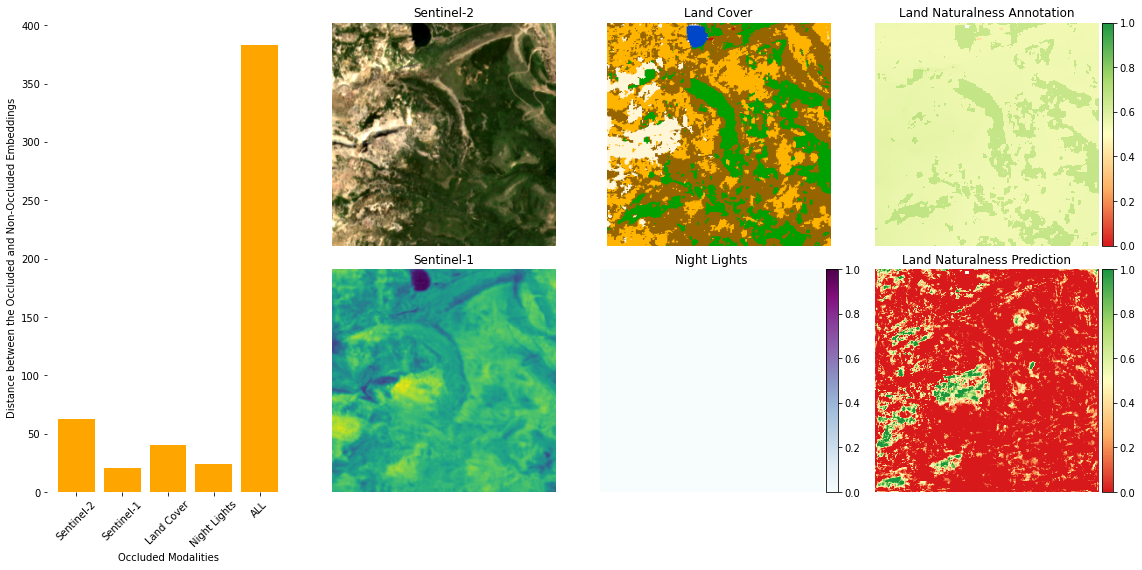

[62.21155548095703, 20.83106231689453, 40.06673049926758, 23.955448150634766, 383.0656433105469]


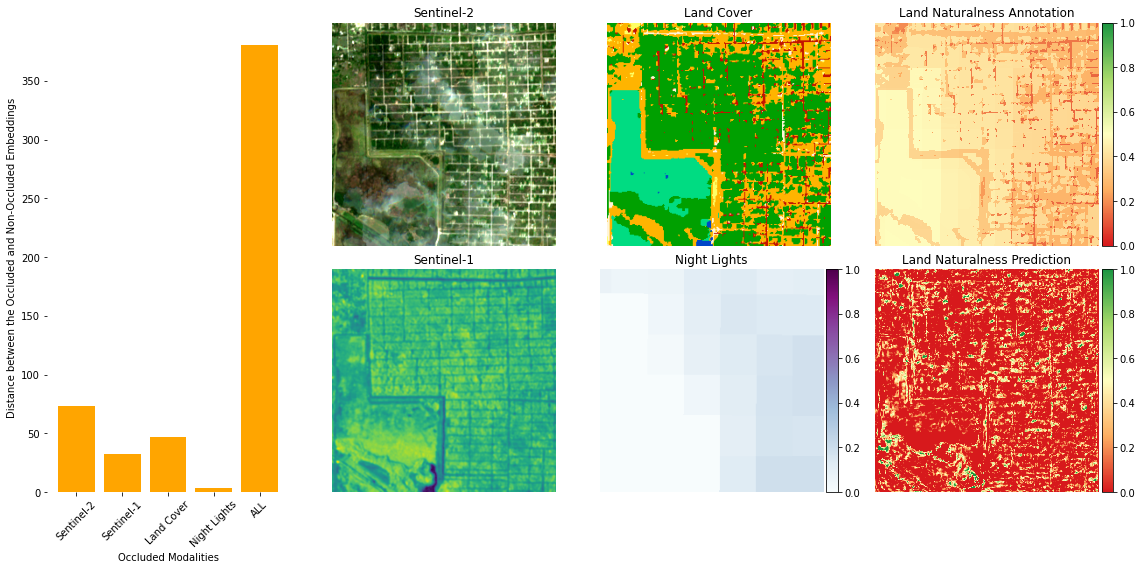

[73.08123779296875, 32.23571014404297, 46.647621154785156, 3.3299334049224854, 380.531005859375]


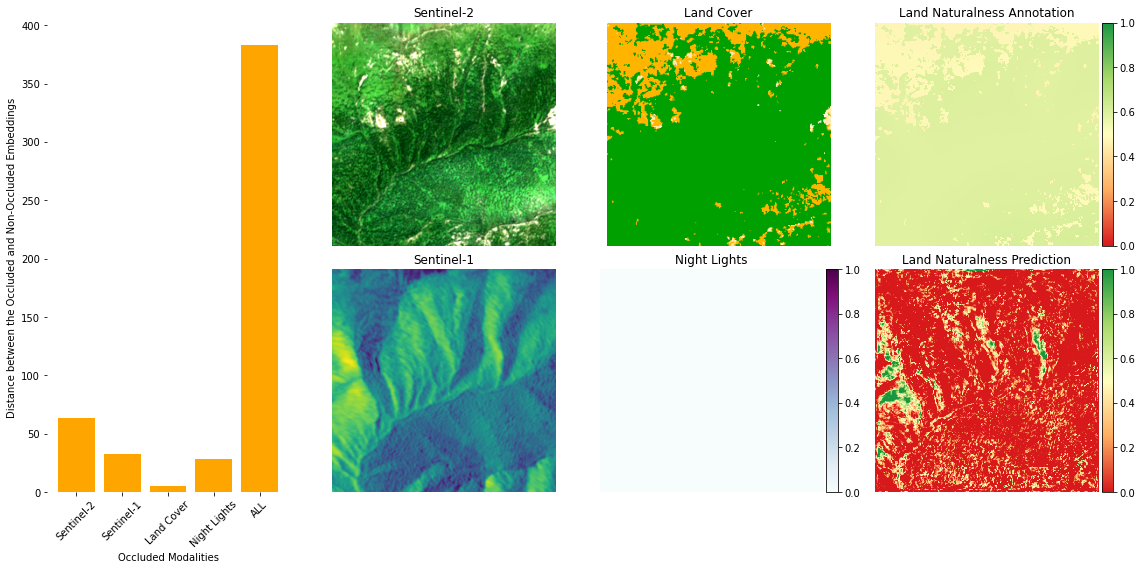

[63.348533630371094, 32.81075668334961, 5.151402950286865, 28.424053192138672, 383.0616760253906]


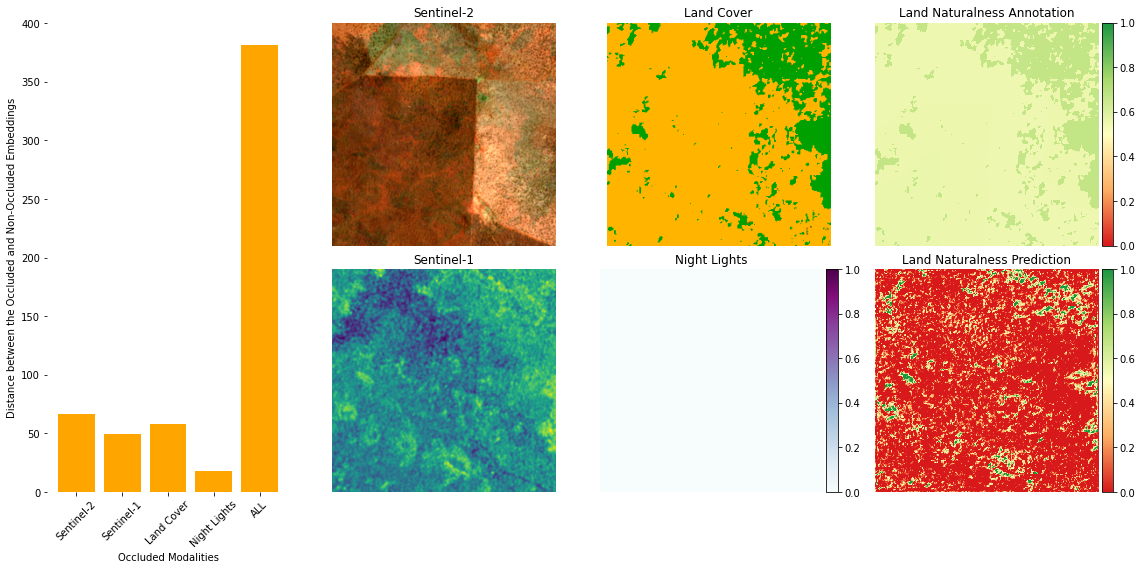

[66.47088623046875, 49.587284088134766, 58.221954345703125, 18.155302047729492, 381.43896484375]


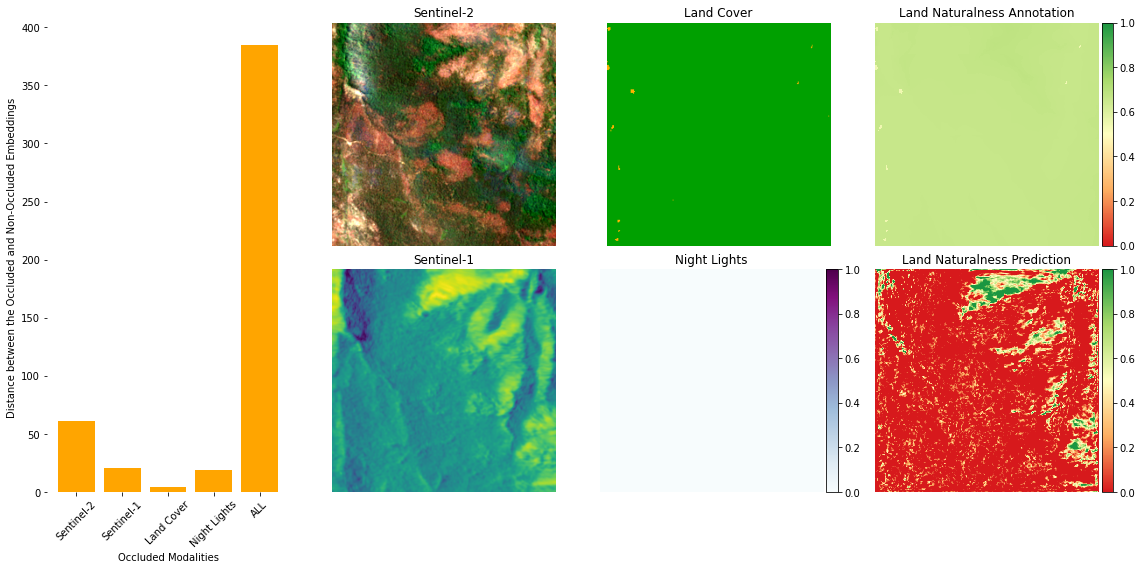

[60.702999114990234, 21.07060432434082, 4.267676830291748, 18.55499267578125, 384.7024230957031]


In [23]:
order = ['S2', 'S1', 'WC', 'VIIRS', 'ALL']
i = 0

for wdpa_id, values in transformed_test_influence_scores.items():
    values_list = [values[modality][0] for modality in order]
    viz_data = get_data_viz(test_dataset, test_model, test_dataset.ids.index(wdpa_id))
    viz_bar_images(idx=wdpa_id, bar_vals=values_list, data=viz_data, exp_id=exp_name)
    print(values_list)
    i += 1 
    if i ==5:
        break

### Viz samples 

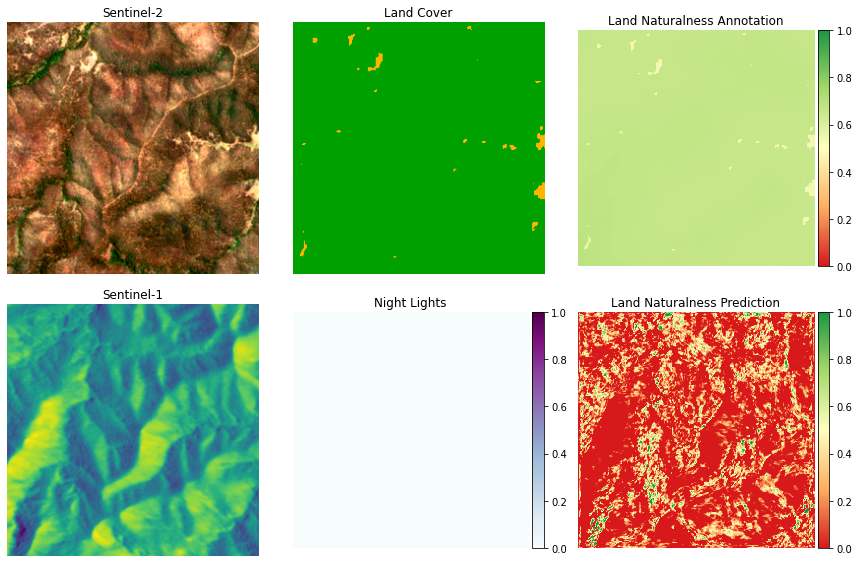

In [27]:
viz_data = get_data_viz(test_dataset, test_model, test_dataset.ids.index(wdpa_id))
viz_images(idx=wdpa_id, data=viz_data)

### Non function 

In [10]:
import torch

In [13]:
logged_diffs = torch.load('./logs/logged_diffs.pt', map_location=torch.device('cpu'))

In [21]:
# Initialize a dictionary to hold the structured analysis
analysis_structure = {}

# Iterate through each item in the loaded list
for item in logged_diffs:
    wdpa_ids = item['wdpa_id'].tolist()  # Convert tensor of WDPA IDs to list
    diffs = item['diffs']

    # Initialize a dictionary for each WDPA ID if not already present
    for wdpa_id in wdpa_ids:
        if wdpa_id not in analysis_structure:
            analysis_structure[wdpa_id] = {modality: [] for modality in diffs.keys()}
    
    # Append the diffs for each modality to the corresponding WDPA ID
    for modality, diff_tensor in diffs.items():
        # Flatten the diff tensor to simplify analysis or select a specific value
        flattened_diff = diff_tensor.view(-1).tolist()  # Convert to a list for easy handling
        
        # Distribute diffs to the corresponding WDPA ID, assuming ordering is consistent
        for wdpa_id, diff_value in zip(wdpa_ids, flattened_diff):
            analysis_structure[wdpa_id][modality].append(diff_value)

In [22]:
analysis_structure

{555622236: {'S1': [139.1313018798828,
   1.0355921983718872,
   1.6297739744186401,
   0.20977988839149475,
   0.08264987170696259,
   2.027322769165039,
   1.3640868663787842,
   0.24358896911144257,
   0.8534157872200012,
   0.10068085044622421,
   0.35631489753723145,
   0.07465183734893799,
   0.023077746853232384,
   0.4996534287929535,
   0.14936719834804535,
   0.038170695304870605,
   0.06554362922906876],
  'S2': [285.13916015625,
   22.713794708251953,
   20.745574951171875,
   4.534682273864746,
   3.399418354034424,
   24.859830856323242,
   25.201942443847656,
   1.977055549621582,
   10.859009742736816,
   0.4337309002876282,
   0.7744380831718445,
   10.30695629119873,
   0.2057427018880844,
   1.3550333976745605,
   0.4744475185871124,
   0.18474863469600677,
   0.09511686116456985],
  'WC': [200.99688720703125,
   3.088001251220703,
   3.6311604976654053,
   0.5175860524177551,
   0.39389726519584656,
   5.543513774871826,
   1.4626771211624146,
   0.2950887680053711,

In [14]:
means

{'S1': 1.7526303656240978,
 'S2': 10.187832828903613,
 'WC': 3.163786872534678,
 'VIIRS': 4.52661868833853}

In [6]:
means

{'S1': 1.7526303656240978,
 'S2': 10.187832828903613,
 'WC': 3.163786872534678,
 'VIIRS': 4.52661868833853}

#### Pathway to Interpretability(GPT search) 